In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import kerastuner as kt
from sklearn.model_selection import train_test_split
import seaborn as sns


def plot_curve(epochs, hist, list_of_metrics,name):
    """Plot a curve of one or more classification metrics vs. epoch."""  
    plt.figure()
    plt.xlabel("Epoch "+name)
    plt.ylabel("Value")

    for m in list_of_metrics:
        x = hist[m]
        plt.plot(epochs[1:], x[1:], label=m)
    plt.legend()
    
    
# for activation functions check https://keras.io/api/layers/activations/
def create_model2(my_learning_rate,momentum,layers,my_metrics,my_act_function = "softmax"):
    model = tf.keras.models.Sequential()
    #model.add(my_feature_layer)

    for layer in layers:
        model.add(tf.keras.layers.Dense(units = layer, activation = my_act_function))
    model.add(tf.keras.layers.Dense(units=6,name='Output', activation = 'softmax'))                             
    model.compile(optimizer=tf.keras.optimizers.SGD(lr=my_learning_rate,momentum=momentum),                                       
                loss=tf.keras.losses.MeanAbsoluteError(),
                metrics=my_metrics)
    return model


def train_model(model,x_data, y_data, epochs, label_name,
                batch_size=None,shuffle=True):
    #features = {name:np.array(value) for name, value in dataset.items()}
    history = model.fit(x=x_data, y=y_data, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle,validation_split=0.2,
                       callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)])
  
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    return epochs, hist
    
    
#returns dataframe
def test_model(model,x_data, y_data ,label_name):
    evaluation=model.evaluate(x = x_data, y = y_data, batch_size=batch_size)
    predicted = model.predict(x_data)
    df_test=pd.DataFrame(y_data,columns=[label_name])
   # print(predicted)
    df_predict=pd.DataFrame(predicted,columns=[label+"_pred" for label in label_name])
    return pd.concat([df_test,df_predict], axis=1)



H:\Users\Gwydion\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
H:\Users\Gwydion\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
H:\Users\Gwydion\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
H:\Users\Gwydion\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub

In [3]:

all_labels_features=["k6a1","k6a2","k11","k12","k9a1","k9a2","delta","lambda","overlap_s0_s2_k6a","overlap_s0_s2_k1","overlap_s0_s2_k9a"]
all_data=pd.read_csv("G:\OneDrive - bwedu\Master\Forschungspraktikum\Inga\pc-forschi\generated_Data/all_param_4_values_with_overlap.csv")
df_feature_labels=all_data[all_labels_features]

max_no_of_peak_list=max(all_data["no_of_max"])
print(max_no_of_peak_list)
df_feature_labels.head()

7


,k6a1,k6a2,k11,k12,k9a1,k9a2,delta,lambda,overlap_s0_s2_k6a,overlap_s0_s2_k1,overlap_s0_s2_k9a
0,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1000,0.6000,0.1000,"[0.5232, 0.3386, 0.1098, 0.0239, 0.004]","[0.7501, 0.2155, 0.031, 0.003, 0.0002]","[0.8102, 0.1704, 0.018, 0.0013, 0.0001]"
1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.0333,0.6000,0.2333,"[0.5232, 0.3386, 0.1098, 0.0239, 0.004]","[0.7501, 0.2155, 0.031, 0.003, 0.0002]","[0.9769, 0.0228, 0.0003, 0.0, 0.0]"
2,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1000,0.6000,0.2333,"[0.5232, 0.3386, 0.1098, 0.0239, 0.004]","[0.7501, 0.2155, 0.031, 0.003, 0.0002]","[0.8102, 0.1704, 0.018, 0.0013, 0.0001]"
3,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1000,0.5333,0.2333,"[0.5232, 0.3386, 0.1098, 0.0239, 0.004]","[0.7501, 0.2155, 0.031, 0.003, 0.0002]","[0.8102, 0.1704, 0.018, 0.0013, 0.0001]"
4,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1000,0.5333,0.1000,"[0.5232, 0.3386, 0.1098, 0.0239, 0.004]","[0.7501, 0.2155, 0.031, 0.003, 0.0002]","[0.8102, 0.1704, 0.018, 0.0013, 0.0001]"


In [19]:
overlap_s0_s2_k6a_array=np.asarray([  np.asarray([x for x in row.replace(",","").replace("[","").replace("]","").replace("  "," ",5).replace(" ",";").split(";") if x!=""],dtype=np.float64)     for row in df_feature_labels["overlap_s0_s2_k6a"] ])

overlap_s0_s2_k1_array=np.asarray([  np.asarray([x for x in row.replace(",","").replace("[","").replace("]","").replace("  "," ",5).replace(" ",";").split(";") if x!=""],dtype=np.float64)     for row in df_feature_labels["overlap_s0_s2_k1"] ])

overlap_s0_s2_k9a_array=np.asarray([  np.asarray([x for x in row.replace(",","").replace("[","").replace("]","").replace("  "," ",5).replace(" ",";").split(";") if x!=""],dtype=np.float64)     for row in df_feature_labels["overlap_s0_s2_k9a"] ])


concat_feature=np.concatenate((overlap_s0_s2_k6a_array,overlap_s0_s2_k1_array,overlap_s0_s2_k9a_array),axis=1)
omega_array=np.zeros((len(concat_feature),3))
#w6a
omega_array[:][0]=0.0740/27.211
#w1
omega_array[:][1]=0.1273/27.211
#w9a
omega_array[:][2]=0.1568/27.211

print(omega_array.shape)
print(concat_feature.shape)
concat_feature=np.concatenate((concat_feature,omega_array),axis=1)


concat_label=df_feature_labels[["k6a1","k6a2","k11","k12","k9a1","k9a2"]].abs().to_numpy()#,"delta","lambda"


x_train_overlap, x_test_overlap,y_train_overlap,y_test_overlap = train_test_split( concat_feature, concat_label  ,test_size=0.20, random_state=42)

print(x_train_overlap)

(65464, 3)
(65464, 15)
[[0.5232 0.3386 0.1098 ... 0.     0.     0.    ]
 [0.9307 0.0669 0.0024 ... 0.     0.     0.    ]
 [0.9307 0.0669 0.0024 ... 0.     0.     0.    ]
 ...
 [0.5232 0.3386 0.1098 ... 0.     0.     0.    ]
 [0.5232 0.3386 0.1098 ... 0.     0.     0.    ]
 [0.9307 0.0669 0.0024 ... 0.     0.     0.    ]]


In [20]:
learning_rate = 1e-2
momentum=0.7
epochs = 50
batch_size = 150

#specify the classification threshold
classification_threshold = 0.15

# Establish the metrics the model will measure.
metric = [tf.keras.metrics.MeanAbsoluteError()]
layers=[16,256,2048,512,64,16]


all_label_list=["k6a1","k6a2","k11","k12","k9a1","k9a2"]#,"delta","lambda"]

my_model= create_model2(learning_rate,momentum,layers,metric,my_act_function="relu")

epochs_run, hist = train_model(my_model,x_train_overlap, y_train_overlap, epochs, 
                          all_label_list, batch_size)


Epoch 1/50

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

280/280 [==============================] - ETA: 0s - loss: 0.0994 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.1002 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.1002 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.1000 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.0999 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.0999 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.0999 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.0998 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.0997

280/280 [==============================] - ETA: 0s - loss: 0.1010 - mean_absolute_error: 0.101 - ETA: 2s - loss: 0.1004 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.1002 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.1004 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.1003 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.1002 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.1003 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.1002 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.1001 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.1002 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.1001 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.1000 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.1000 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.1001 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.1001 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.1000 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.1000 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.1000 - mean_absolute_

280/280 [==============================] - ETA: 0s - loss: 0.0987 - mean_absolute_error: 0.098 - ETA: 2s - loss: 0.0999 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.1001 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.1000 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.1000 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.0999 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.1001 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.1001 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.1000 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.0999 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.0999 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.0999 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.0999 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.1000 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.1000 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.1000 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.1000 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.1000 - mean_absolute_

280/280 [==============================] - ETA: 0s - loss: 0.0995 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.0997 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.0996 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.0997 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.0996 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.0997 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.0998 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.0998 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.0997 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.0998 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.0998 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.0999 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.1000 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.0999 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.1000 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.1000 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.1000 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.1000 - mean_absolute_

280/280 [==============================] - ETA: 0s - loss: 0.1009 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.0996 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.1000 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.0999 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.1000 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.1001 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.1001 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.0999 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.0999 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.0999 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.0999 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.0999 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.0999 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.0999 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.0999 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.0999 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.0999 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.1000 - mean_absolute_

280/280 [==============================] - ETA: 0s - loss: 0.1017 - mean_absolute_error: 0.101 - ETA: 2s - loss: 0.0998 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.1000 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.1000 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.1001 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.1001 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.1002 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.1002 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.1002 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.1001 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.1001 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.1001 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.1001 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.1000 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.0999 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.0999 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.1000 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.1000 - mean_absolute_

280/280 [==============================] - ETA: 0s - loss: 0.0992 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.0995 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.0994 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.0995 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.0994 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.0995 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.0995 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.0995 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.0996 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.0998 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.0998 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.0998 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.0998 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.0999 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.0999 - mean_absolute_error: 0.099 - ETA: 2s - loss: 0.1000 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.1000 - mean_absolute_error: 0.100 - ETA: 2s - loss: 0.1000 - mean_absolute_

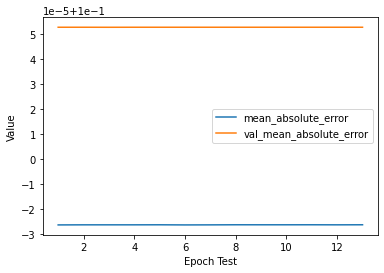

In [21]:
list_of_metrics_to_plot = ['mean_absolute_error',"val_mean_absolute_error"] 
plot_curve(epochs_run, hist, list_of_metrics_to_plot,"Test")

In [22]:
#print(y_test_overlap)
delta_test_result=test_model(my_model,x_test_overlap,y_test_overlap,all_label_list)



delta_test_result.head(50)

88/88 [==============================] - ETA: 0s - loss: 0.1007 - mean_absolute_error: 0.100 - ETA: 0s - loss: 0.1003 - mean_absolute_error: 0.100 - ETA: 0s - loss: 0.1003 - mean_absolute_error: 0.100 - ETA: 0s - loss: 0.1001 - mean_absolute_error: 0.100 - ETA: 0s - loss: 0.1002 - mean_absolute_error: 0.100 - ETA: 0s - loss: 0.1002 - mean_absolute_error: 0.100 - 0s 3ms/step - loss: 0.1002 - mean_absolute_error: 0.1002


,"(k6a1,)","(k6a2,)","(k11,)","(k12,)","(k9a1,)","(k9a2,)",k6a1_pred,k6a2_pred,k11_pred,k12_pred,k9a1_pred,k9a2_pred
0,0.0333,0.0333,0.1000,0.1000,0.0333,0.0333,0.163530,0.169757,0.170894,0.166699,0.164647,0.164472
1,0.0333,0.0333,0.0333,0.1000,0.1000,0.0333,0.163530,0.169757,0.170894,0.166699,0.164647,0.164472
2,0.1000,0.0333,0.0333,0.0333,0.1000,0.0333,0.163675,0.169798,0.170573,0.166688,0.164750,0.164515
3,0.0333,0.0333,0.0333,0.0333,0.1000,0.0333,0.163675,0.169798,0.170573,0.166688,0.164750,0.164515
4,0.0333,0.0333,0.1000,0.0333,0.0333,0.0333,0.163675,0.169798,0.170573,0.166688,0.164750,0.164515
5,0.0333,0.0333,0.0333,0.1000,0.1000,0.1000,0.163988,0.169378,0.170033,0.166921,0.164728,0.164951
6,0.1000,0.1000,0.0333,0.0333,0.0333,0.0333,0.163946,0.169583,0.169657,0.166924,0.164949,0.164941
7,0.1000,0.0333,0.1000,0.1000,0.0333,0.1000,0.163988,0.169378,0.170033,0.166921,0.164728,0.164951
8,0.0333,0.0333,0.1000,0.1000,0.1000,0.1000,0.163988,0.169378,0.170033,0.166921,0.164728,0.164951
9,0.0333,0.0333,0.1000,0.1000,0.1000,0.0333,0.163530,0.169757,0.170894,0.166699,0.164647,0.164472
